# Chapter 3: Classification

## 1. Pendahuluan

Bab 3 dari buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" ini berfokus pada sistem klasifikasi, yang merupakan salah satu tugas utama dalam pembelajaran terawasi (supervised learning) selain regresi. Dalam bab ini, konsep-konsep dasar klasifikasi dijelaskan secara mendalam, terutama dengan menggunakan dataset MNIST yang populer.


## 2. Dataset MNIST

Dataset MNIST diperkenalkan sebagai "hello world" di dunia Machine Learning untuk tugas klasifikasi. Dataset ini terdiri dari 70.000 gambar kecil tulisan tangan digit (0-9), dengan setiap gambar berukuran 28x28 piksel dan memiliki 784 fitur (intensitas piksel dari 0 hingga 255). Dataset ini sudah dibagi menjadi 60.000 gambar untuk training dan 10.000 gambar untuk testing. Penulis menekankan pentingnya memiliki data training yang sudah di-shuffled untuk memastikan konsistensi dalam cross-validation dan mencegah bias urutan data pada beberapa algoritma pembelajaran.


## 3. Melatih Pengklasifikasi Biner (Binary Classifier)

Konsep klasifikasi biner dijelaskan dengan contoh "pendeteksi angka 5", di mana tujuannya adalah membedakan gambar angka 5 dari bukan angka 5. Untuk tugas ini, digunakan pengklasifikasi Stochastic Gradient Descent (SGDClassifier) dari Scikit-Learn. SGDClassifier dipilih karena kemampuannya menangani dataset yang sangat besar secara efisien, karena ia memproses instance pelatihan secara independen satu per satu.


## 4. Pengukuran Kinerja (Performance Measures)
Evaluasi kinerja pengklasifikasi adalah bagian penting yang dibahas secara rinci dalam bab ini, mengingat bahwa akurasi (ratio of correct predictions) saja seringkali bukan metrik yang memadai, terutama untuk dataset yang skewed (di mana beberapa kelas jauh lebih sering muncul daripada yang lain).

- Akurasi Menggunakan Validasi Silang (Cross-Validation): Penulis menunjukkan bagaimana fungsi cross_val_score() dari Scikit-Learn digunakan untuk mengukur akurasi. Namun, dicontohkan juga bagaimana pengklasifikasi "bodoh" yang selalu memprediksi "bukan angka 5" bisa mencapai akurasi 90% pada dataset MNIST, menyoroti keterbatasan akurasi sebagai metrik utama pada dataset yang tidak seimbang.

- Confusion Matrix: Diperkenalkan sebagai cara yang lebih baik untuk mengevaluasi kinerja pengklasifikasi. Matriks ini menghitung berapa kali instance dari kelas A diklasifikasikan sebagai kelas B. Konsep True Negatives (TN), False Positives (FP), False Negatives (FN), dan True Positives (TP) dijelaskan secara jelas. Fungsi cross_val_predict() digunakan untuk mendapatkan prediksi "bersih" pada set pelatihan untuk membangun matriks kebingungan.

- Presisi (Precision) dan Recall: Dua metrik penting yang berasal dari matriks kebingungan dijelaskan:
-- Presisi: Rasio prediksi positif yang benar (TP / (TP + FP)). Menjawab pertanyaan "Dari semua yang diprediksi positif, berapa banyak yang benar-benar positif?".
-- Recall (Sensitivitas / True Positive Rate - TPR): Rasio instance positif yang berhasil dideteksi oleh pengklasifikasi (TP / (TP + FN)). Menjawab pertanyaan "Dari semua yang sebenarnya positif, berapa banyak yang berhasil dideteksi?".
-- F1 Score: Rata-rata harmonik dari presisi dan recall (2 * (Presisi * Recall) / (Presisi + Recall)). Metrik ini lebih memilih pengklasifikasi yang memiliki presisi dan recall yang seimbang.

- Trade-off Presisi/Recall: Dijelaskan bahwa tidak mungkin memiliki presisi dan recall yang tinggi secara bersamaan; meningkatkan satu akan mengurangi yang lain, dan sebaliknya. Konsep decision function dan threshold dari SGDClassifier digunakan untuk mengilustrasikan bagaimana menggeser threshold akan memengaruhi trade-off ini. Fungsi precision_recall_curve() digunakan untuk memplot presisi dan recall sebagai fungsi dari threshold.

- Kurva ROC (Receiver Operating Characteristic): Metrik umum lainnya yang digunakan dengan pengklasifikasi biner. Kurva ROC memplot True Positive Rate (recall) terhadap False Positive Rate (FPR). Area Under the Curve (AUC) dari kurva ROC juga dijelaskan sebagai metrik untuk membandingkan pengklasifikasi, di mana nilai 1 menunjukkan pengklasifikasi sempurna dan 0.5 menunjukkan pengklasifikasi acak. Penulis memberikan panduan kapan harus menggunakan kurva PR (ketika kelas positif jarang atau lebih peduli pada FP) dan kapan harus menggunakan kurva ROC.

## 5. Klasifikasi Multikelas (Multiclass Classification)
Bagian ini memperluas diskusi ke pengklasifikasi yang dapat membedakan lebih dari dua kelas (misalnya, digit 0-9). Dua strategi utama dijelaskan:
- One-versus-the-Rest (OvR) / One-versus-All (OvA): Melatih satu pengklasifikasi biner untuk setiap kelas (misalnya, 10 pengklasifikasi untuk MNIST). Prediksi didasarkan pada skor tertinggi dari semua pengklasifikasi.

- One-versus-One (OvO): Melatih pengklasifikasi biner untuk setiap pasangan kelas (misalnya, 45 pengklasifikasi untuk MNIST). Kelas yang memenangkan duel terbanyak adalah hasil prediksi. Scikit-Learn secara otomatis memilih strategi OvR atau OvO ketika menggunakan algoritma klasifikasi biner untuk tugas multikelas. Contoh penggunaan SVC (Support Vector Classifier) dan SGDClassifier untuk klasifikasi multikelas diberikan. Penulis juga menyoroti pentingnya feature scaling (StandardScaler) untuk meningkatkan akurasi pada pengklasifikasi multikelas, seperti yang dibahas pada Bab 2.

## 6. Analisis Kesalahan (Error Analysis)
Bagian ini membahas bagaimana menganalisis jenis kesalahan yang dibuat oleh pengklasifikasi untuk menemukan cara memperbaikinya. Matriks kebingungan divisualisasikan menggunakan matshow() dari Matplotlib. Dengan menormalkan matriks kebingungan (membagi dengan jumlah instance di setiap kelas) dan mengisi diagonalnya dengan nol, kita dapat memfokuskan visualisasi pada kesalahan. Contoh menunjukkan bahwa angka 3 dan 5 seringkali saling tertukar, dan banyak gambar salah diklasifikasikan sebagai 8. Saran untuk perbaikan termasuk mengumpulkan lebih banyak data pelatihan untuk kasus-kasus yang membingungkan atau merekayasa fitur baru (misalnya, menghitung jumlah closed loops pada digit) atau pra-pemrosesan gambar.


## 7. Klasifikasi Multilabel (Multilabel Classification)
Konsep di mana pengklasifikasi dapat menghasilkan beberapa kelas untuk satu instance dijelaskan (misalnya, mengenali beberapa orang dalam satu gambar). Contoh diberikan untuk dataset MNIST di mana setiap digit diberi label apakah "besar" (7, 8, 9) dan "ganjil". KNeighborsClassifier digunakan sebagai contoh pengklasifikasi yang mendukung multilabel classification. Penulis juga membahas metrik evaluasi untuk multilabel classification, seperti F1 score rata-rata ("macro" atau "weighted").


## 8. Klasifikasi Multioutput (Multioutput Classification)
Ini adalah generalisasi dari klasifikasi multilabel di mana setiap label dapat bersifat multiclass (memiliki lebih dari dua nilai yang mungkin). Contoh yang diberikan adalah sistem penghilang noise dari gambar digit, di mana setiap piksel adalah label yang dapat memiliki nilai intensitas dari 0-255. Penulis mencatat bahwa batas antara klasifikasi dan regresi terkadang kabur, seperti dalam contoh ini.

## 9. Kesimpulan
Bab ini berhasil memberikan pemahaman yang komprehensif tentang klasifikasi, mulai dari konsep dasar hingga teknik evaluasi yang lebih canggih. Pentingnya memilih metrik yang tepat, memahami trade-off presisi/recall, dan menganalisis kesalahan untuk perbaikan model ditekankan.

In [8]:
# Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

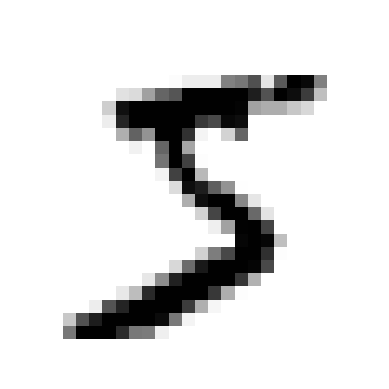

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

X = mnist["data"] # X tetap sebagai DataFrame
y = mnist["target"].astype(np.uint8)

some_digit = X.iloc[0].values # Mengakses baris pertama dan mengkonversinya ke NumPy array 
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training a Binary Classifier

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

Performance Measures
Measuring Accuracy Using Cross-Validation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Precision and Recall

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

Precision/Recall Trade-off

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [28]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [29]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [31]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

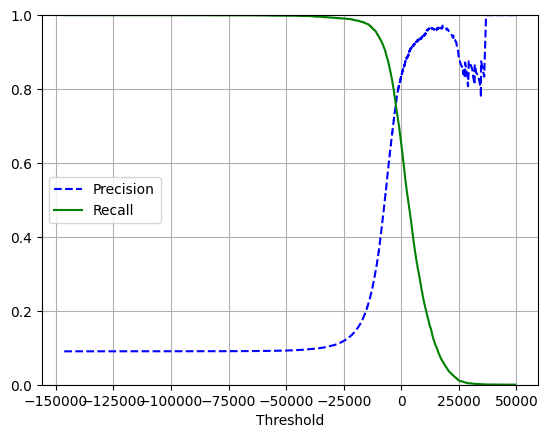

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    # You might want to add more code here to make the plot look better
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.grid(True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

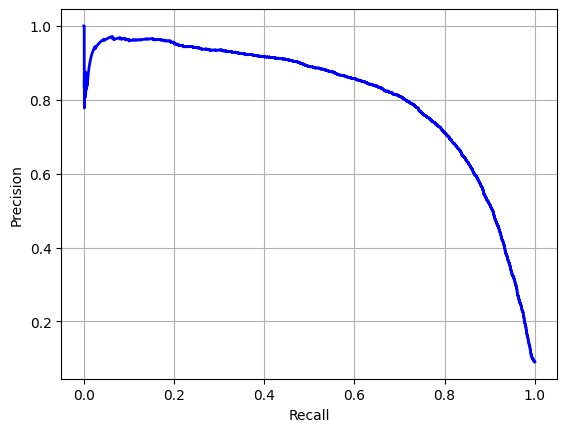

In [33]:
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

In [34]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

The ROC Curve

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

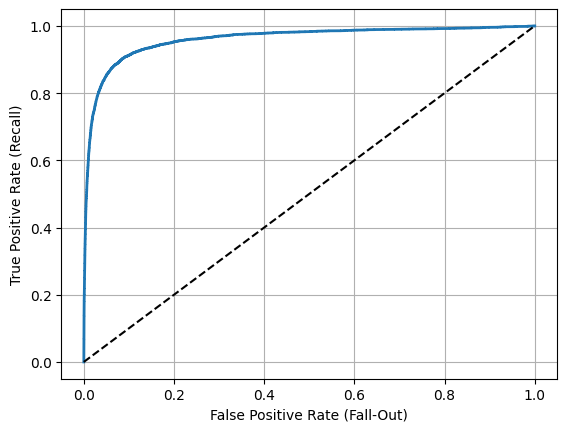

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate (Fall-Out)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid(True)

plot_roc_curve(fpr, tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [41]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

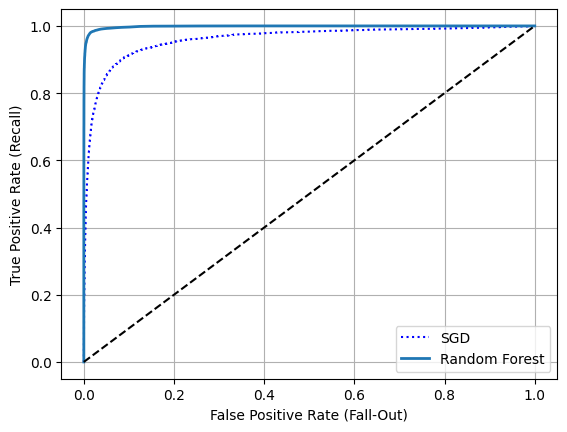

In [42]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

Multiclass Classification

In [44]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5

SVC()

In [45]:
svm_clf.predict([some_digit])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [47]:
import numpy as np # Import numpy for np.argmax
np.argmax(some_digit_scores)

np.int64(5)

In [48]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [49]:
svm_clf.classes_[5]

np.uint8(5)

In [50]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [51]:
ovr_clf.predict([some_digit])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2

array([5], dtype=uint8)

In [52]:
len(ovr_clf.estimators_)

10

In [53]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [54]:
sgd_clf.predict([some_digit])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [55]:
sgd_clf.decision_function([some_digit])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [56]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])